Für dieses Projekt werden wir öffentlich verfügbare Daten von LendingClub.com verwenden. Lending Club bringt Leute zusammen, die Geld brauchen (Leihende) und solche, die Geld investieren möchten (Geldgeber). Als Invester möchte man dann verständlicherweise vor allem an die Leute sein Geld verleihen, die es mit einer hohen Wahrscheinlichkeit zurückzahlen. Wir werden versuchen ein Modell zu erstellen, dass bei dieser Vorhersage hilft.

Wir werden Daten von 2007 bis 2010 verwenden, bevor das Unternehmen an die Börse ging. Anhand der Daten werden wir versuchen vorherzusagen, ob ein Leihender das Geld zurückgezahlt hat oder nicht. Die Daten haben wir als CSV in den Kursunterlagen beigefügt. Diese Datei wurde bereits um die nicht verfügbaren Einträge gesäubert.

Schauen wir uns noch die verfügbaren Spalten an:

    credit.policy: 1 falls der Kunde die Risikobewertung besteht, 0 falls nicht.
    purpose: Der Zweck des Kreidts (Werte sind "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", und "all_other").
    int.rate: Der Zinssatz des Kreidts als Anteil (eine Rate von 11% würde 0.11 sein). Kreditnehmer, die LendingClub.com als riskanter einstuft erhalten einen höheren Zins.
    installment: Die monatliche Zeilzahlung, die der Kreditnehmer leistet, wenn der Kredit finaziert wird.
    log.annual.inc: Der natürliche Log des angegebenen jährlichen Einkommens des Kreditnehmers.
    dti: Die "debt-to-income" Rate des Kreditnehmers (Kredit geteilt durch jährliches Einkommen.
    fico: Der FICO Kreditscore des Kreditnehmers.
    days.with.cr.line: Anzahl der Tage an denen der Kunde einen Dispokredit hatte.
    revol.bal: Die Bilanz am Ende eines Kreditkartenabrechnungszeitraums.
    revol.util: Der erstattete Anteil am Gesamtkredit.
    inq.last.6mths: Die Anzahl an Anfragen, die Kreditgeber in den letzten 6 Monaten an den Kreditnehmer gestellt haben.
    delinq.2yrs: Die Anzahl der Vorkommnisse eines Verzugs von über 30 Tagen innerhalb der letzten 2 Jahre.
    pub.rec: Die Anzahl an negativen Einträgen (Bankrott, Steuerverzug, Verurteilungen,...) des Kreditnehmers.


In [4]:
#importiere die notwendigen Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Lese die Daten ein
loans = pd.read_csv('Loan_Data.csv')

In [6]:
#Schauen wir uns zunächst das Datenset an
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


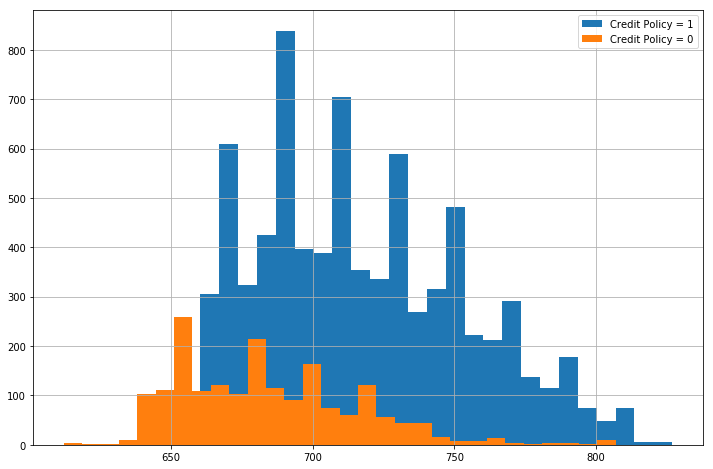

In [16]:
#Führen wir die Explorative Datenanalyse durch. Zuerst schauen wir uns die Verteilung von FICO an in Abhängigkeit von Credit Policy
plt.figure(figsize=(12,8))
loans['fico'][loans['credit.policy']==1].hist(bins = 30, label = 'Credit Policy = 1' )
loans['fico'][loans['credit.policy']==0].hist(bins = 30, label = 'Credit Policy = 0')
plt.legend()

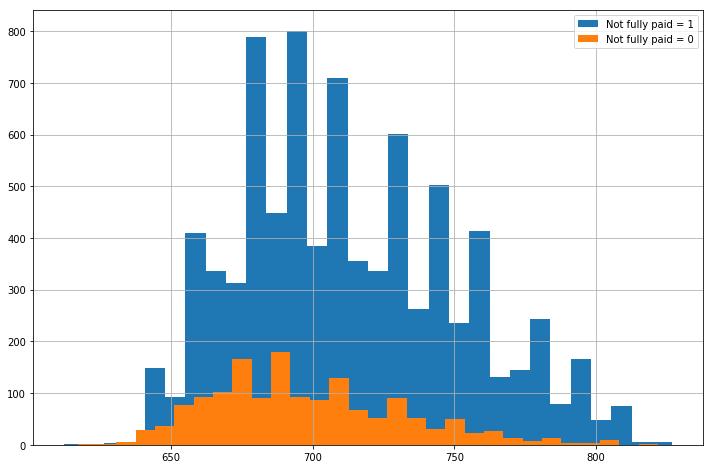

In [32]:
#Jetzt schauen wir uns die gleiche Aufteilung für Fico nach 'not.fully.paid' an
plt.figure(figsize=(12,8))
loans['fico'][loans['not.fully.paid']==0].hist(bins = 30, label = 'Not fully paid = 1')
loans['fico'][loans['not.fully.paid']==1].hist(bins = 30, label = 'Not fully paid = 0')
plt.legend()

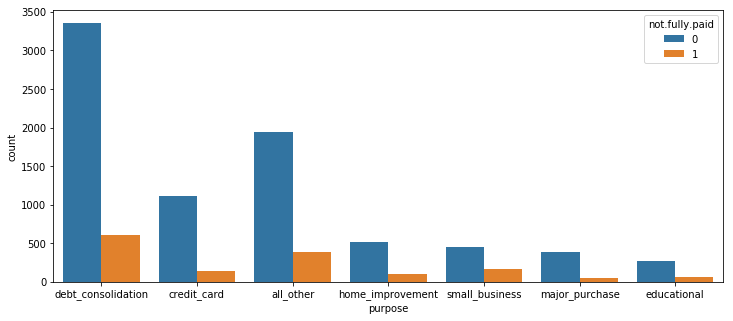

In [49]:
#Schauen wir uns die Anzahl der Leihgaben nach Zweck an und teilen die Ergebnisse nach 'not fully paid' auf
plt.figure(figsize=(12,5))
sns.countplot('purpose', hue = 'not.fully.paid', data = loans)



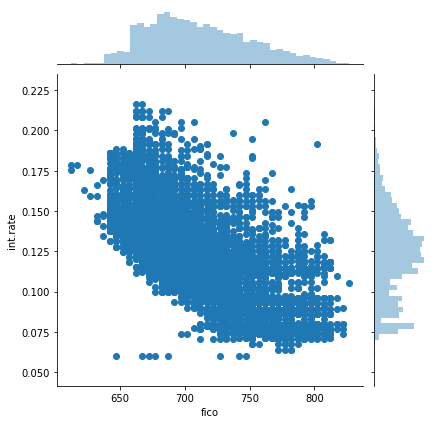

In [51]:
#Wir betrachten zunächst den Trend zwischen FICO Score und den Zinsen('int.rate'). Man kann auf dem Graph leicht erkennen, dass die Zinsen de
sns.jointplot(x = 'fico', y = 'int.rate', data = loans)

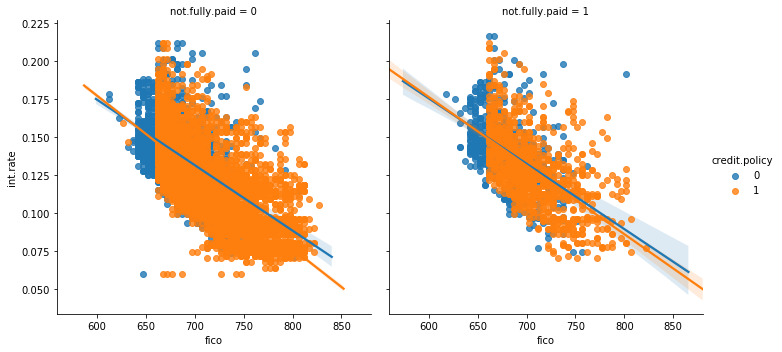

In [52]:
#Schauen wir uns den Trend zwischen 'not fully paid' und 'credit policy' an. Teile dafür die Diagramme für FICO vs Zinssatz auf.
sns.lmplot(x = 'fico', y = 'int.rate', data = loans, hue = 'credit.policy', col='not.fully.paid')

In [53]:
#In diesem Projekt wollen wir das Modell Random Forest verwenden. Schauen wir uns dazu die Felder noch ein Mal an:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [54]:
#Wir sehen, dass das Feld 'purpose' kategorisch ist. Wir müssen diesen in Dummy-Variable umwandeln, damit sklearn damit arbeiten kann. 
cat_feats = ['purpose']

In [55]:
final_data = pd.get_dummies(loans, columns= cat_feats, drop_first=True)

In [56]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [78]:
#Nun wird es Zeit die Daten in Train und Test aufzuteilen
X = final_data.drop('not.fully.paid', axis = 1)
y= final_data['not.fully.paid']
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [107]:
#importiere das Modell
from sklearn.tree import DecisionTreeClassifier

In [108]:
dtree = DecisionTreeClassifier()

In [109]:
#fitte die Trainingsdaten
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
#Jetzt machen wir die Vorhersagen mit Dtree Modell
dtree_pred = dtree.predict(X_test)

In [111]:
#Und werten die Ergebnisse aus. Wir verwenden dafür Classification Report und Confusion Matrix. Wir sehen, dass die Ergebnisse zwar okay sind. Man kann diese aber sicherlich noch verbessern! 
from sklearn.metrics import classification_report, confusion_matrix

In [112]:
print(classification_report(y_test, dtree_pred))
print('\n')
print(confusion_matrix(y_test, dtree_pred))

             precision    recall  f1-score   support

          0       0.84      0.84      0.84      2392
          1       0.22      0.23      0.22       482

avg / total       0.74      0.73      0.74      2874



[[2002  390]
 [ 373  109]]


In [126]:
#Nun verwenden wir das Modell Random Forest dafür. Als Anzahl der Bäume wählen wir 600 aus
from sklearn.ensemble import RandomForestClassifier

In [131]:
forest_model = RandomForestClassifier(n_estimators=600)

In [132]:
#Fitte das Modell, mache die Vorhersagen und werte diese aus
forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
forest_pred = forest_model.predict(X_test)

In [134]:
print(classification_report(y_test, forest_pred))
print('\n')
print(confusion_matrix(y_test, forest_pred))

             precision    recall  f1-score   support

          0       0.83      1.00      0.91      2392
          1       0.45      0.02      0.04       482

avg / total       0.77      0.83      0.76      2874



[[2381   11]
 [ 473    9]]


In [ ]:
#Keine der Modellen war besonders gut. Wir müssen die Eigenschaften näher untersuchen und anpassen.